# Quantum Computing Introduction - Assignment 2
# Names:
# IDs:

Welcome to the second assignment! During this assignment, you will use the IBM Qiskit package. This framework offers a huge variety of very interesting functionalities to explore. This assignment will require you to investigate about the proper usage of the tool. Please refer to the [IBM Quantum Documentation](https://qiskit.org/documentation/).


# Python environment

In [ ]:
from qiskit.quantum_info import Statevector

# Introduction to Python

This first section contains some (non specifically quantum related) questions to demonstrate your Python programming skills

## Question 1

Write a small program that accepts three integers (a, b and c) as input, and whose output is `True` only if c lies between a and b. If not, then the output should be `False`.

In [ ]:
def is_between(a, b, c):
    if a < c < b:
        return True
    else:
        return False

# Get inputs from user
a = 1
b = 3
c = 2

# Output the result
print(is_between(a, b, c))

## Question 2

Write a function that, given a list of positive numbers, returns the largest number. Write a program that uses such function by: asking the user to enter the number of elements in the list, generating a list of random numbers, uses your function to obtain the largest number in the list and printing the correspoding results (both the list of numbers and the largest number in the list).

In [ ]:
def large_number(a, b, c):
    list_of_numbers = [a, b, c]
    largest_number = max(list_of_numbers)
    return list_of_numbers, largest_number

# Get inputs from user
a = 12
b = 5
c = 8

# For input from user, uncomment the following lines:
# a = int(input("Enter integer a: "))
# b = int(input("Enter integer b: "))
# c = int(input("Enter integer c: "))

# Output the result
list_of_numbers, largest_number = large_number(a, b, c)
print(list_of_numbers)
print(largest_number)

## Question 3

Write a small program, using a for-loop, that given a word and a forbidden letter (provided by the user, via keyboard), tells you if the word contains the forbidden letter or not.

In [ ]:
def forbidden_word(word):
    forbidden_letters = ['a', 'e', 'i', 'o', 'u']
    for letter in forbidden_letters:
        if letter in word:
            return (f'you cant use the word {word} because it contains the letter {letter}')
        elif letter.upper() in word:
            return (f'you cant use the word {word} because it contains the letter {letter.upper()}')
    return (f'you can use the word {word} because it does not contain any forbidden letters')

# Get input from user
word = input("Enter a word: ")
print(forbidden_word(word))

## Question 4

Write a function that, given a square matrix of arbitrary size as input, returns the trace of that matrix. Write a program that uses such function by: asking the user to enter the dimensions of the matrix, generating a random matrix of the requested dimensions, uses your function to compute the trace of the matrix and printing the correspoding results (both the matrix and the trace).

**NB:** It is not allowed to use the function numpy.trace!

In [ ]:
import random

def generate_random_numbers(n):
    random_numbers = []
    for _ in range(n):
        random_numbers.append(random.randint(1, 100))
    return random_numbers

def trace(matrix):
    trace = 0
    for i in range(len(matrix)):
        trace += matrix[i][i]
    return trace

def main():
    n = int(input("Enter the size of the matrix (n x n): "))
    matrix = []
    
    for i in range(n):
        row = generate_random_numbers(n)
        matrix.append(row)
    
    print("Generated Matrix:")
    for row in matrix:
        print(row)
    
    trace_value = trace(matrix)
    print(f"The trace of the matrix is: {trace_value}")

if __name__ == "__main__":
    main()

## Question 5

Write a small program to draw a scatter plot, using the mathplotlib module, to show the sea level in the past 100 years. Use the data set from: `sealevel.txt`

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('QCI - Assignment2\\Assignment2\\sealevel.txt')

x = df['year']
y = df['sea_level']

plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Sea Level')
plt.title('Sea Level Over Time')
plt.show()

print(df.head())

## Question 6

Write a small program that, using mathplotlib, draw a line plot that shows on a daily base the highest price the DJIA reached. Use the data set from: `djia.txt`.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('QCI - Assignment2\\Assignment2\\djia.txt', encoding='utf-8-sig')

# When reading this, try to comment the line under here and run the code to see what happens. 
# Then, uncomment it and run the code again to see the difference.
df['Date'] = pd.to_datetime(df['Date'])

x = df['Date']
y = df['High']

plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('High')
plt.title('DJIA High Price Over Time')
plt.show()

print(df.head())

# Introduction to Qiskit

This second section contains some exercises about single-qubit quantum circuits. The following cell contains some useful definitions and functions for the development of your assignment. They were already introduced in the Qiskit Introduction notebook and included here in case you need them.

In [ ]:
# Function: obtain_vector(quantum_circuit)
#
# 
# This function accepts an arbitrary circuit, performs its state vector simulation and 
# returns the resulting vector state as a [x, y, z] vector that could be plotted
def obtain_vector(qc):

    # Execute the state vector simulation
    resulting_vector = Statevector(qc)

    return resulting_vector


# Function: simulate_circuit_and_obtain_vector(quantum_circuit, number_shots)
#
# 
# This function accepts an arbitrary circuit, performs its state vector simulation for
# a number of trials, collects the sample counts and the resulting probabilities and
# returns the resulting vector state as a [x, y, z] vector that could be plotted
def simulate_circuit_and_obtain_vector(qc, trials = 10000):

    # Execute the state vector simulation
    resulting_vector = Statevector(qc)

    # Execute the simulation for a number of trials (10000 per deault)
    counts = resulting_vector.sample_counts(shots = trials)

    # Collect the results from the job
    probabilities = resulting_vector.probabilities()

    return resulting_vector, counts, probabilities



For the first question you are going to use the [Operator](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.quantum_info.Operator) to construct the unitary matrix for a Qiskit [QuantumCircuit](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit), and the [Statevector](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Statevector#statevector) to obtain the quantum state vector of a given circuit. It is important to point out that when using these operators, the circuit can only contain gates (e.g., no measure).

## Question 7

One of your classmates is claiming the following equivalence: `Z = HXH`. 

1. Perform the matrix operation represented by the following quantum circuit and show that, indeed, the transformation matrix correspond to the Pauli-Z matrix:
![Question7](img/qci_a2_question7.png)

2. As mentioned during the lesson, Qiskit initializes the qubits in the $\ket{0}$ state. However, applying the Pauli-Z gate over the $\ket{0}$ state does not produce an observable difference. Therefore, you have to convert the $\ket{0}$ state into the $\ket{1}$ state, then simulate a single shot of the circuit and show the resulting state vector.

3. Is it true the claim of your classmate about `Z = HXH`? Explain your reasoning.

In [1]:
%matplotlib inline

from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
import numpy as np

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Apply H, X, H to demonstrate Z = HXH
qc.h(0)  # Hadamard gate
qc.x(0)  # Pauli-X gate
qc.h(0)  # Hadamard gate

print("Circuit for Z = HXH:")
print(qc)

unitary = Operator(qc).data
print("\nUnitary matrix of HXH:")
print(unitary)

Z_matrix = np.array([[1, 0], [0, -1]])
print("\nPauli-Z matrix:")
print(Z_matrix)

print("\nAre they equivalent?", np.allclose(unitary, Z_matrix))

Circuit for Z = HXH:
   ┌───┐┌───┐┌───┐
q: ┤ H ├┤ X ├┤ H ├
   └───┘└───┘└───┘

Unitary matrix of HXH:
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]

Pauli-Z matrix:
[[ 1  0]
 [ 0 -1]]

Are they equivalent? True


For the following questions you can use whatever simulator you consider useful to solve them (e.g., [Operator](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.quantum_info.Operator), [Statevector](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Statevector#statevector) or [BasicSimulator](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.providers.basic_provider.BasicSimulator)). Read carefully the questions and identify the most suitable simulator for your purposes. Additionally, remember to use the [circuit.measure()](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#measure) function to obtain the counts of the simulation when using the [BasicSimulator](https://quantum.cloud.ibm.com/docs/en/api/qiskit/qiskit.providers.basic_provider.BasicSimulator).


## Question 8

You have the following quantum circuit
![Question8](img/qci_a2_question8.png)

1. Adjust the circuit so that the initial state is $\ket{q_{0}} = \ket{-}$.

2. What is the resulting vector state?

3. Perform a 100000 shots simulation of the circuit and plot the resulting probabilities.

Adjusted circuit with initial state |->:
   ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ X ├┤ H ├┤ Z ├┤ H ├┤ X ├┤ H ├
   └───┘└───┘└───┘└───┘└───┘└───┘

Resulting vector state:
Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))

Counts from 100000 shots simulation:
{'0': 50305, '1': 49695}


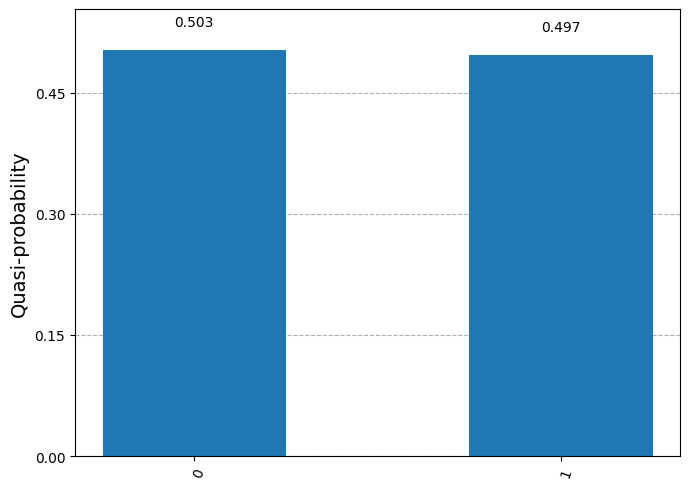

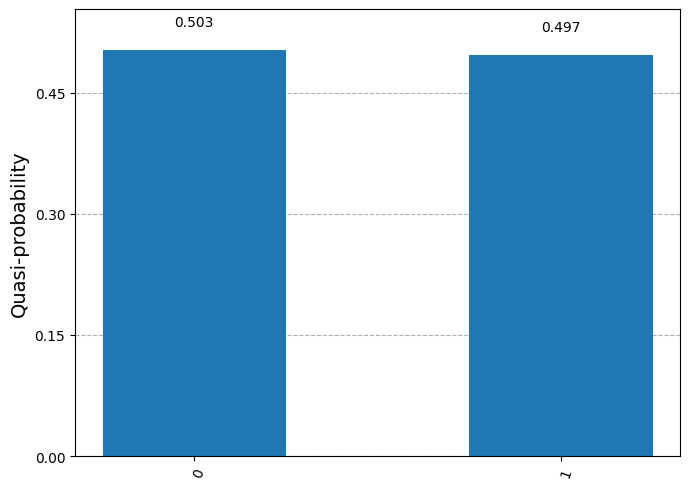

In [2]:
%matplotlib inline

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import plot_distribution
from qiskit.quantum_info import Operator
import numpy as np

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Adjust the circuit so that the initial state is |q_0> = |->
# |-> = H X |0>, so apply X then H to prepare |->
qc.x(0)  # X gate to |1>
qc.h(0)  # H gate to |->

# Apply the original circuit: Z H X H
qc.z(0)  # Pauli-Z gate
qc.h(0)  # Hadamard gate
qc.x(0)  # Pauli-X gate
qc.h(0)  # Hadamard gate

print("Adjusted circuit with initial state |->:")
print(qc)

# 2. What is the resulting vector state?
resulting_vector = Statevector(qc)
print("\nResulting vector state:")
print(resulting_vector)

# 3. Perform a 100000 shots simulation of the circuit and plot the resulting probabilities.
# Create a copy of the circuit for measurement
qc_meas = qc.copy()
qc_meas.add_register(ClassicalRegister(1))
qc_meas.measure(0, 0)

# Simulate with BasicSimulator
simulator = BasicSimulator()
job = simulator.run(qc_meas, shots=100000)
result = job.result()
counts = result.get_counts(qc_meas)

print("\nCounts from 100000 shots simulation:")
print(counts)

# Plot the resulting probabilities
plot_distribution(counts)

## Question 9

Simulate the following quantum circuit
![Question9](img/qci_a2_question9.png)

1. Plot the initial, all the intermediate and the resulting state vectors on the Bloch sphere.

2. Imagine that you perform a 10000000 shots simulation of the proposed circuit. What probabilities would you expect to obtain? Explain why.

3. Perform a 100000 shots simulation of the proposed circuit and plot the resulting probabilities. Does the plot of the resulting probabilities match your previous answer?

Initial |0>: Bloch vector [0.000, 0.000, 1.000]
After H: Bloch vector [1.000, 0.000, 0.000]
After H T: Bloch vector [0.707, 0.707, 0.000]
Resulting H T H: Bloch vector [0.000, -0.707, 0.707]

Circuit with H, T, H gates:
   ┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├
   └───┘└───┘└───┘

Resulting vector state:
Statevector([0.85355339+0.35355339j, 0.14644661-0.35355339j],
            dims=(2,))

Counts from 100000 shots simulation:
{'1': 14756, '0': 85244}


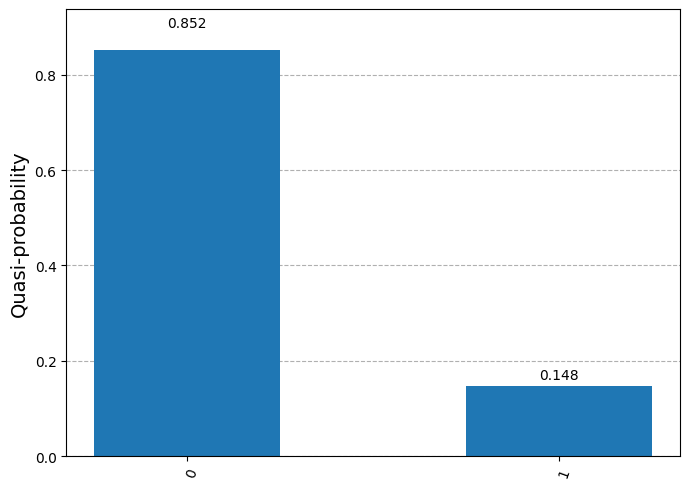

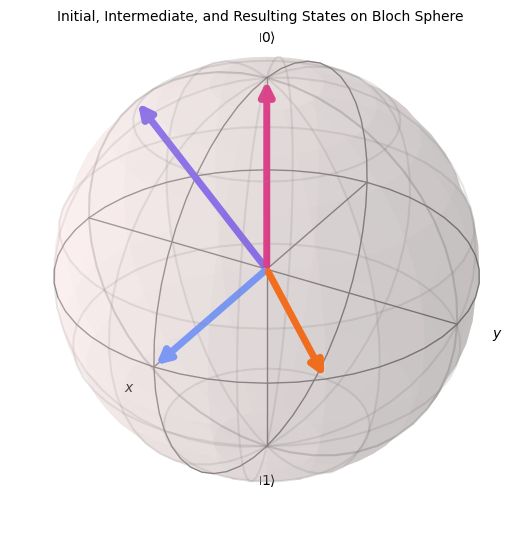

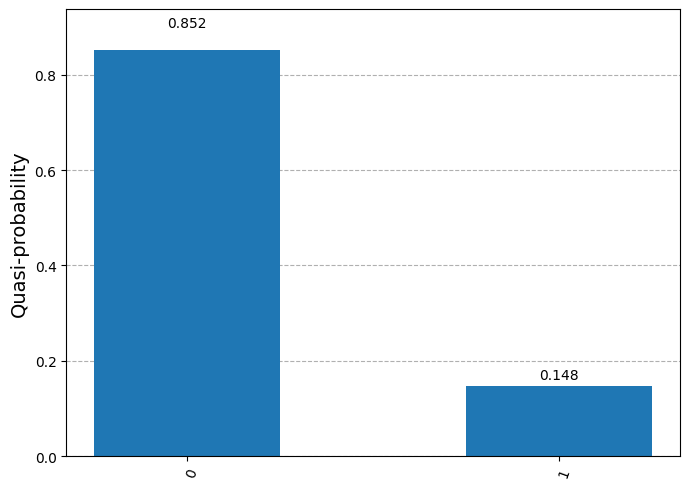

In [3]:
%matplotlib inline

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import plot_distribution, plot_bloch_vector
from qiskit.quantum_info import Operator
import numpy as np

# Create partial circuits for each stage
qc_initial = QuantumCircuit(1)  # Initial state |0>

qc_after_h = QuantumCircuit(1)
qc_after_h.h(0)  # After first H

qc_after_h_t = QuantumCircuit(1)
qc_after_h_t.h(0)
qc_after_h_t.t(0)  # After H T

qc_full = QuantumCircuit(1)
qc_full.h(0)
qc_full.t(0)
qc_full.h(0)  # Full circuit H T H

# Compute Bloch vectors for each state (x,y,z)
vectors = []
states = [qc_initial, qc_after_h, qc_after_h_t, qc_full]
state_names = ["Initial |0>", "After H", "After H T", "Resulting H T H"]

for qc_partial, name in zip(states, state_names):
    sv = Statevector(qc_partial)
    a, b = sv.data
    # compute Bloch coordinates from amplitudes a (alpha) and b (beta)
    x = 2 * (a.real * b.real + a.imag * b.imag)
    y = 2 * (a.real * b.imag - a.imag * b.real)
    z = abs(a)**2 - abs(b)**2
    vectors.append([float(x), float(y), float(z)])
    print(f"{name}: Bloch vector [{x:.3f}, {y:.3f}, {z:.3f}]")

# 1. Plot the initial, all intermediate, and resulting state vectors on the Bloch sphere
# plot_bloch_vector accepts a single [x,y,z] or a list of such vectors
plot_bloch_vector(vectors, title="Initial, Intermediate, and Resulting States on Bloch Sphere")

print("\nCircuit with H, T, H gates:")
print(qc_full)

# 2. What is the resulting vector state?
resulting_vector = Statevector(qc_full)
print("\nResulting vector state:")
print(resulting_vector)

# 3. Perform a 100000 shots simulation of the circuit and plot the resulting probabilities.
# Create a copy of the circuit for measurement
qc_meas = qc_full.copy()
qc_meas.add_register(ClassicalRegister(1))
qc_meas.measure(0, 0)

# Simulate with BasicSimulator
simulator = BasicSimulator()
job = simulator.run(qc_meas, shots=100000)
result = job.result()
counts = result.get_counts(qc_meas)

print("\nCounts from 100000 shots simulation:")
print(counts)

# Plot the resulting probabilities
plot_distribution(counts)

## Question 10

Assume the following quantum state represented in the following Bloch sphere (blue vector):

![Question10](img/qci_a2_question10.png)

1. Show the set of gates that should be applied to a initial state equals to $\ket{1}$ (red vector) in order to obtain the presented quantum state.

2. Plot all the intermediate states resulting of the application of the gates in your own Bloch sphere.

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

# circuit with 1 qubit
qc = QuantumCircuit(1)

# set starting state to |1>
qc.x(0)

# Apply Hadamard
qc.h(0)

# calculate statevector
state = Statevector.from_instruction(qc)

print("Final statevector:")
print(state)

# Plot Bloch sphere
plot_bloch_multivector(state)
plt.show()

Final statevector:
Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


In [ ]:
print('Software version:\n')
!pip list | grep "qiskit"
!pip list | grep "IBMQuantumExperience"
!python --version

##### 